# Lecture IV: Solving Search problems with MATLAB

"*Always code as if the guy who ends up reading your code will be a violent psychopath who knows where you live*" - John Woods

## 1. Introduction

Search and Matching models are important in economics. They are one of the best explanations for involuntary unemployment since they propose that search frictions are relevant. As is common in economics, the theory developed can be used in different settings. In this case, search theory is not reduced to labor markets. 

The search and matching framework can also explain the housing market, the marriage market (yes, in economics, marriage is a market), health donations, and so on. One of the main characteristics of a search environment is the trade-off between accepting an offer or rejecting it and continuing to search. An easy way to understand this trade-off is through dating apps. Would you wait until you meet the love of your life  (i.e., "the one"), or would you date anyone above a certain threshold? There it is the trade-off.

However, it took economists a while to apply these models in practice, as they usually do not have an analytical solution. So, economists must rely on computational methods to solve them.

In this lecture, we will explore a simple model for search and matching using real data to calibrate it. Do not worry if you do not know anything about search; we will go slowly and explain everything you need to know. Also, remember that this is a computational workshop, so the main focus is to use our newly acquired skills to solve problems.

## 2. A simple model of Search and Matching: The algebra

Let's imagine an economy in which we have an amount of workers equal to one. This measure means that if we take 0.5 workers, we have half the total number of workers in the economy. 0.25 represents one quarter, and so on.

These workers are homogenous in their human capital levels, which means that they are all equally productive **ex-ante**. 

Only unemployed workers can search for a job but cannot direct their search to a specific firm. Rather than that, the search is random, which can be interpreted as they are applying to all the firms that are offering jobs. 

The unemployed worker receives unemployment benefits, given by $z$, at the beginning of every period. This benefit helps the workers while they are unemployed; once they have a job, the benefit is lost until they are unemployed again.

One time per period, the worker can have a match with a firm looking for a worker. The number of matches created in the economy depends on the number of unemployed workers ($U$) and vacancies ($V$) posted. In particular, the following function rules out the amount of matches created:

$$ m(U,V) = U^\gamma V^{1-\gamma} $$

Assuming $\gamma=0.5$, let's see how this function looks:

In [19]:
eps = 1e-4;
gamma=0.5;
u = linspace(eps,1-eps,100);
v = linspace(eps,1-eps,100);

m = u.^gamma .* v.^(1-gamma)

m = 1x100 double
    0.0001    0.0102    0.0203    0.0304    0.0405    0.0506    0.0607    0.0708    0.0809    0.0910    0.1011    0.1112    0.1213    0.1314    0.1415    0.1516    0.1617    0.1718    0.1819    0.1920    0.2021    0.2122    0.2223    0.2324    0.2425    0.2526    0.2627    0.2728    0.2829    0.2930
...

OK, so it is increasing when unemployment or vacancies increase.

Also, workers are not indifferent to time and have a discount factor igual to $\rho = 0.98$.

Now, given a number of vacancies $V_0$ and a number of unemployed workers $U_0$, notice that the probability that an unemployed worker will have a match is given by:

$$ \frac{m(U_0,V_0)}{U_0} $$

Now, notice that the matching function has constant returns to scale, then we can enter the $U_0$ that is dividing to the function:

$$ m\left(1, \frac{V_0}{U_0} \right) $$

And just for simplicity, we will define $ \frac{V_0}{U_0} = \theta$, and we will call $\theta$ the market tightness.

Then, we can rearrange the function and say that the probability of having a match being an unemployed worker is given by:

$$ m(\theta) $$

What about firms? Well, the probability that a firm will fill the vacancy is given by:

$$ \frac{m(U_0,V_0)}{V_0} = \frac{m(U_0,V_0) \frac{1}{U_0}}{V_0 \frac{1}{U_0}} = \frac{m(\theta)}{\theta} $$

Now, do you remember the idea of value function? We will apply it here to understand the value of being unemployed and employed. In this case, someone unemployed will receive the benefits $z$ and, with some probability, $m(\theta)$ will receive a job offer. The job offer is associated with the draw of a productivity parameter $x$, which signals how productive the match is. Then, the worker must decide whether to accept or reject the offer. If they accept the offer, they will receive a value of employment $N(x)$ and lose the value of unemployment. If they reject the offer, nothing happens:

$$ \rho U = z + m(\theta) \int_{0}^{\infty} \max_{accept,reject} \lbrace N(x)-U,0 \rbrace dG(x) $$

If a worker is employed, she will receive a wage in each period. Notice that the wage will depend on the productivity draw, $x$. Then, in the next period, the job can be destroyed with a probability $\delta$, and the worker will be unemployed again. Therefore, we can summarize this in the following equation:

$$ \rho N(x) = w(x) + \delta [U-N(x)] $$

Or:

$$ N(x) = \frac{1}{\rho + \delta} [w(x) + \delta U] $$

Great! Now, let's check the firms. There are two types: those with filled vacancies and those looking for workers.

If a firm already has a worker, the firm will receive the production $x$ minus the wage that goes to the worker $w(x)$, and in the next period, the job could be destroyed, and then the firm will have to post a vacancy again.

This can be summarized in:

$$\rho J(x) = x - w(x) + \delta [V - J(x)]$$

Or:

$$ J(x) = \frac{1}{\rho + \delta} [x-w(x)+\delta V] $$

A firm looking for a worker has to pay $c$ to post the vacancy. It has a probability $m(\theta)/\theta$ of having a match with a worker, and then they can decide whether to accept or reject.

$$ \rho V = - c +\frac{m(\theta)}{\theta} \int_{0}^{\infty}\max_{accept,reject} \lbrace J(x) - V , 0 \rbrace dG(x) $$ 

Excellent! Now we have almost everything to work. However, we still need one key component: wages. Once the firm and the worker see the productivity draw $x$, they will bargain the wages, following a classical Nash bargaining scheme:

$$ w(x) = \arg \max [ (N(x) - U ]^\beta [J(x) - V]^{1-\beta} $$

Where $\beta$ represents the bargaining value of the workers, and $1-\beta$ represents the firms' bargaining power. 

Before taking the FOC, we will apply logs:

$$ \beta \ln [N(x) - U] + (1-\beta) \ln [J(x) - V] $$

Now, we will apply the derivate with respect to $w(x)$. Notice that both $N(x)$ and $J(x)$ depend on $w(x)$. Then:

$$ \frac{\beta}{N(x)-U} \frac{dN(x)}{dw(x)} + \frac{1-\beta}{J(x)-V} \frac{dJ(x)}{dw(x)} = 0 $$

Checking the definitions:

$$ \frac{dN(x)}{dw(x)} = \frac{1}{\rho + \delta} $$

And:

$$ \frac{dJ(x)}{dw(x)} = \frac{-1}{\rho + \delta} $$

Therefore:

$$ \frac{\beta}{N(x)-U} \frac{1}{\rho + \delta} - \frac{1-\beta}{J(x)-V} \frac{1}{\rho + \delta} = 0 $$

Then, we can simplify:

$$ \frac{\beta}{N(x)-U} - \frac{1-\beta}{J(x)-V} = 0 $$

Rearrange:

$$ \frac{\beta}{N(x)-U} = \frac{1-\beta}{J(x)-V} $$

$$ \beta [J(x)-V] = (1-\beta)[N(x)-U] $$

Now, we can replace the definitions of $J(x)$ and $N(x)$:

$$ \beta \left[ \frac{[x-w(x)+\delta V]}{\rho+\delta} - V\right] = (1-\beta) \left[ \frac{[w(x)+\delta U]}{\rho+\delta} - U \right]$$

Rearrange:

$$ \beta \left[ \frac{[x-w(x)-\rho V]}{\rho+\delta}\right] = (1-\beta) \left[ \frac{[w(x)-\rho U]}{\rho+\delta} \right]$$

Again, simplify:

$$ \beta[x-w(x)-\rho V]= (1-\beta)[w(x)-\rho U]$$

Split the terms:

$$ \beta x - \beta w(x) - \beta \rho V = w(x) - \beta w(x) - (1-\beta)\rho U $$

Simplify:

$$ \beta x - \beta \rho V = w(x)- (1-\beta) \rho U $$

Then:

$$ w(x) = \beta x + (1-\beta) \rho U - \beta \rho V  $$

Finally, we will impose a new condition: free entry. If there is free entry of firms, the expected value of posting a vacancy has to be zero. Then:

$$ w(x) = \beta x + (1-\beta) \rho U $$

This expression is quite intuitive. Let's check it. When the worker's bargaining power is bigger, the fraction of the production that goes to the worker will be greater. In the opposite case, when the firm has more bargaining power, the firm will try to pay the least possible, which is given by the value of unemployment. Notice that the firm cannot pay less than this because the workers will decide to stay unemployed.

Now that we have all the ingredients, we can work the expressions a bit. First, let's notice that the least $x$ the worker will require to accept a job is given by $\rho U$. Why? Well, replace that value in the wage equation:

$$ w(\rho U) = \beta \rho U + (1-\beta)  \rho U = \rho U$$

So, now we can incorporate that knowledge into the value of being unemployed:

$$ \rho U = z + m(\theta) \int_{0}^{\infty} \max_{accept,reject} \lbrace N(x)-U,0 \rbrace dG(x) $$

We will split the integral into two parts:

$$ \rho U = z + m(\theta) \left[ \int_{0}^{\rho U} \max_{accept,reject} \lbrace N(x)-U,0 \rbrace dG(x) + \int_{\rho U}^{\infty} \max_{accept,reject} \lbrace N(x)-U,0 \rbrace dG(x)  \right]$$

Then, the worker will reject the offer in the first part, but they will accept the offer in the second part, so:

$$ \rho U = z + m(\theta)\int_{\rho U}^{\infty} [ N(x)-U ] dG(x)$$

Then, we can replace the value of $N(x)$:

$$ \rho U = z + m(\theta)\int_{\rho U}^{\infty} \left[ \frac{1}{\rho + \delta} [w(x) + \delta U]  -U \right] dG(x)$$

$$ \rho U = z + m(\theta)\int_{\rho U}^{\infty} \left[ \frac{1}{\rho + \delta} [w(x) - \rho U]  \right] dG(x)$$

$$ \rho U = z + m(\theta)\int_{\rho U}^{\infty} \left[ \frac{1}{\rho + \delta} [\beta x + (1-\beta) \rho U - \rho U]  \right] dG(x)$$

$$ \rho U = z + m(\theta)\int_{\rho U}^{\infty}  \beta \left[ \frac{x-\rho U}{\rho + \delta} \right] dG(x)$$

Great. Now we can work more with the vacancy equation:

$$ \rho V = - c +\frac{m(\theta)}{\theta} \int_{0}^{\infty}  \max_{accept,reject} \lbrace J(x) - V , 0 \rbrace dG(x) $$ 

Again, we split:

$$ \rho V = - c +\frac{m(\theta)}{\theta} \left[ \int_{0}^{\rho U} \max_{accept,reject} \lbrace J(x) - V , 0 \rbrace dG(x) + \int_{\rho U}^{\infty} \max_{accept,reject} \lbrace J(x) - V , 0 \rbrace dG(x) \right]$$ 

We know that the worker will reject in the first case:

$$ \rho V = - c +\frac{m(\theta)}{\theta} \int_{\rho U}^{\infty} [ J(x) - V]  dG(x) $$ 

Then, we apply the free entry condition, that means $V=0$:

$$ 0 = - c +\frac{m(\theta)}{\theta} \int_{\rho U}^{\infty} J(x)  dG(x) $$ 

Then, we replace $J(x)$:

$$ 0 = - c +\frac{m(\theta)}{\theta} \int_{\rho U}^{\infty} \frac{x-w(x)}{\rho + \delta}  dG(x) $$ 

$$ c = \frac{m(\theta)}{\theta} \int_{\rho U}^{\infty} \frac{x-\beta x - (1-\beta) \rho U}{\rho + \delta}  dG(x) $$

$$ c = \frac{m(\theta)}{\theta} \int_{\rho U}^{\infty}  \frac{(1-\beta)(x- \rho U)}{\rho + \delta}  dG(x) $$

And we are done! What else? Well, we need to impose some conditions to have a stationary equilibrium. These conditions are essentially two. First, all the workers are either employed or unemployed:

$$ e +u = 1$$

The most important one is the flow condition. This means that in equilibrium, the number of workers entering unemployment has to be equal to the number of workers exiting unemployment. If that is the case, the unemployment rate is constant.

$$ \delta e = m(\theta) [1 - G(\rho U)] u $$

Great! After this brief detour, we can solve the model. What is solving the model? Given a group of parameters, we will find the values $\rho U$ and $\theta$ that are consistent with those values and simultaneously sustain a stationary equilibrium.

What parameters do we need? We need to know $z, c, \delta, \rho, \beta, \gamma, \mu$ and $\sigma$

## 3. A simple model of Search and Matching: The code to solve

OK, let's discuss conceptually how to solve this and then we will write the code. We will start with a guess of the market tightness $\theta$. If we know the market tightness, we can solve for $\rho U$ in the equation for the value of unemployment:

$$ \rho U = z + m(\theta)\int_{\rho U}^{\infty}  \beta \left[ \frac{x-\rho U}{\rho + \delta} \right] dG(x)$$

From this equation, we will have a value $\rho U$. Then, we can use that value to solve for $\theta$ in the following equation:

$$ c = \frac{m(\theta)}{\theta} \int_{\rho U}^{\infty}  \frac{(1-\beta)(x- \rho U)}{\rho + \delta}  dG(x) $$

Then, we can compare the two $\theta$'s: the guess and the final. If they are equal, we are done! If they are not equal, we have to try a new guess. In general we will use as a new guess the final value obtained in the previous procedure.

So, the first thing we will do is create a function that, given the model's parameters, will solve for the unemployment value.

### 3.1 The fsolve() function

However, before doing this, we will have to learn how to use a new function: fsolve(). Let's check it.

In [4]:
help fsolve

 FSOLVE solves systems of nonlinear equations of several variables.
 
    FSOLVE attempts to solve equations of the form:
              
    F(X) = 0    where F and X may be vectors or matrices.   
 
    FSOLVE implements three different algorithms: trust region dogleg,
    trust region, and Levenberg-Marquardt. Choose one via the option
    Algorithm: for instance, to choose trust region, set OPTIONS =
    optimoptions('fsolve','Algorithm','trust-region'), and then pass
    OPTIONS to FSOLVE.
     
    X = FSOLVE(FUN,X0) starts at the matrix X0 and tries to solve the 
    equations in FUN.  FUN accepts input X and returns a vector (matrix) of 
    equation values F evaluated at X. 
 
    X = FSOLVE(FUN,X0,OPTIONS) solves the equations with the default
    optimization parameters replaced by values in OPTIONS, an argument
    created with the OPTIMOPTIONS function.  See OPTIMOPTIONS for details.
    Use the SpecifyObjectiveGradient option to specify that FUN also
    returns a second o

So, this function works if we put an equation of the form $f(x)=0$, where x can be a scalar or a vector. Notice also that we have to specify the function. Great. Let's try it with an example. Consider the equation given by:

$$ x^2-5x = 3 $$

Use the function to solve for the value of $x$.

So, first, we will have to rearrange the equation:

$$ x^2-5x-3=0$$

Then, we will create a function associated with it.

In [9]:
fun = @(x) x^2-5*x-3

fun(2)

fun(10)

fun = function_handle with value:
    @(x)x^2-5*x-3

ans = -9

ans = 47

Excellent. So, the point that solves the function is between 2 and 10. Remember that we could use the bisection algorithm or the Newton method to solve this. Now, we will not do it because the function will.

The last thing we will need is an initial value. This could be anything that makes sense, but in larger problems, having a good guess is useful.

In [19]:
x0=2

[x_star, fval] = fsolve(fun,x0);

x_star
fun(x_star)

x0 = 2


Equation solved.

fsolve completed because the vector of function values is near zero
as measured by the value of the function tolerance, and
the problem appears regular as measured by the gradient.



x_star = -0.5414

ans = 3.9524e-14

Wait, what? We were expecting something between 2 and 10, but the method gave us a negative value, which is a solution! Well, remember that quadratic equations have two solutions, which means that we found one of them. If we just adjust the initial guess a bit, we can find the other solution.

In [22]:
x0=5

[x_star, fval] = fsolve(fun,x0);

x_star
fun(x_star)

x0 = 5


Equation solved.

fsolve completed because the vector of function values is near zero
as measured by the value of the function tolerance, and
the problem appears regular as measured by the gradient.



x_star = 5.5414

ans = 3.5527e-15

Excellent! Hopefully, you noticed how important the initial guess is with this method. This problem is easy, and you can solve it without the computer, but in more difficult problems, the standard procedure is to use several guesses to confirm that the value that we are finding is not restricted because of the initial point.

### 3.2 The unem_solver() function

So now, going back to our problem, we have to find the value $\rho U$ that solves:

$$ \rho U = z + m(\theta)\int_{\rho U}^{\infty}  \beta \left[ \frac{x-\rho U}{\rho + \delta} \right] dG(x)$$

And just to be super clear, the correct notation for this is:

$$ \rho U = z + m(\theta)\int_{\rho U}^{\infty}  \beta \left[ \frac{x-\rho U}{\rho + \delta} \right] g(x) dx$$

This could look scary, mainly because $ \rho U $ is in the integration limits. We will not solve this with our methods, but if you are curious, you can use the Newton method. To deal with the derivative of an integration limit, you just have to apply the Leibniz rule and ta-da!

So, let's assume these parameters for the model:

In [132]:
z     = 1     ; % Instant utility of being unemployed
delta = 0.05  ; % Probability of job destruction
beta  = 0.5   ; % Bargain power of workers
mu    = 5     ; % Mean of productivity
sigma = 2.5   ; % Standard deviation of productivity
c     = 1     ; % Cost of openning a vacancy
rho   = 0.067 ; % Discount factor
gamma = 0.5   ; % Matching elasticity

OK. First, we will compute the integral. To do this, we can create the following function:

In [82]:
aux = @(x,beta,rhoU,rho,delta,mu,sigma) beta.*(x-rhoU)/(rho+delta).*normpdf(x,mu,sigma);

Here, I'm using the function normpdf(), which gives us the probability density of a given point in a normal distribution with some mean and standard deviation.

In [84]:
help normpdf

 NORMPDF Normal probability density function (pdf).
    Y = NORMPDF(X,MU,SIGMA) returns the pdf of the normal distribution with
    mean MU and standard deviation SIGMA, evaluated at the values in X.
    The size of Y is the common size of the input arguments.  A scalar
    input functions as a constant matrix of the same size as the other
    inputs.
 
    Default values for MU and SIGMA are 0 and 1 respectively.
 
    See also NORMCDF, NORMFIT, NORMINV, NORMLIKE, NORMRND, NORMSTAT.

    Documentation for normpdf
       doc normpdf

    Other uses of normpdf

       distributed/normpdf



Now, we will define the integral. Notice something tricky here. The integral goes to infinity. This is not complicated for Matlab, we can use:

In [87]:
y = inf

y = Inf

And then, $y$ has the biggest value that Matlab can hold. However, in practical terms, we do not want to do this, and here is the reason. This integral is the continuous version of this sum:

$$ \sum_{i=1}^\infty f(x_i) p(x_i) $$

Where $f(x_i)$ is the value of the function when $x=x_i$ and $P(x_i)$ is the probability of $x=x_i$. However, there are values for which we know the likelihood of taking those values is zero. For example, let's see the distribution that we have here.

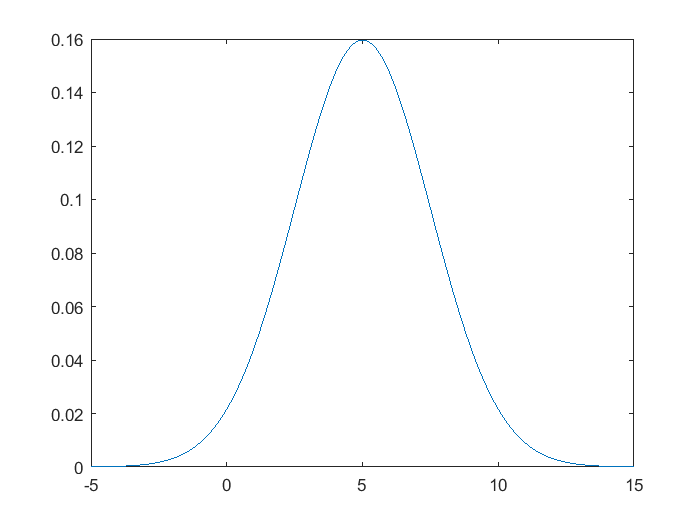

In [91]:
x = linspace(-5,15,1000);

figure
plot(x, normpdf(x,mu,sigma))

Here we have the normal. Notice that after 15, there is almost no probability of having that point. In fact:

In [93]:
normpdf(15,mu,sigma)

ans = 5.3532e-05

So, what is the point of computing this integral until infinity if we know that the probability is already very close to zero when $x=15$? So we will restrict the integral up to 15. Later, we will check if considering until infinity changes the results.

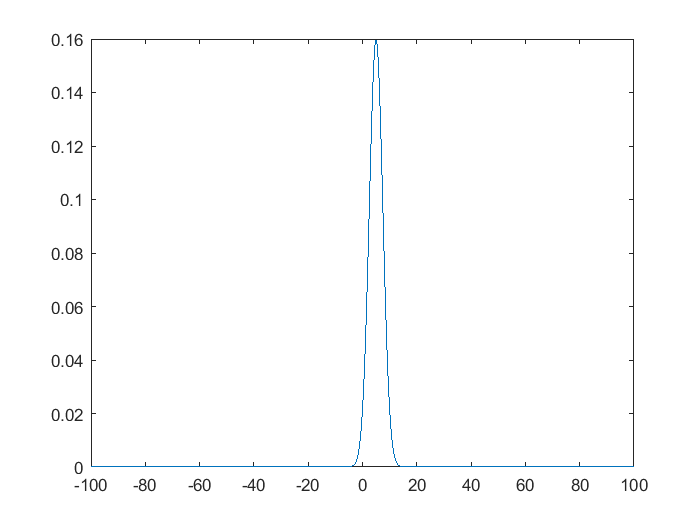

In [96]:
x = linspace(-100,100,10000);

figure
plot(x, normpdf(x,mu,sigma))

In [97]:
M = 15;

integral_worker = @(rhoU) integral( @(x) aux(x,beta,rhoU,rho,delta,mu,sigma),rhoU,M);

Let's study the code for the integral. 

In [99]:
help integral

 INTEGRAL  Numerically evaluate integral.
    Q = INTEGRAL(FUN,A,B) approximates the integral of function FUN from A
    to B using global adaptive quadrature and default error tolerances.
 
    FUN must be a function handle. A and B can be -Inf or Inf. If both are
    finite, they can be complex. If at least one is complex, INTEGRAL
    approximates the path integral from A to B over a straight line path.
 
    For scalar-valued problems the function Y = FUN(X) must accept a vector
    argument X and return a vector result Y, the integrand function
    evaluated at each element of X. For array-valued problems (see the
    'ArrayValued' option below) FUN must accept a scalar and return an
    array of values.
 
    Q = INTEGRAL(FUN,A,B,PARAM1,VAL1,PARAM2,VAL2,...) performs the
    integration with specified values of optional parameters. The available
    parameters are
 
    'AbsTol', absolute error tolerance
    'RelTol', relative error tolerance
 
        INTEGRAL attempts to satisf

The function integral() requires a function and a variable of integration and the integration limits. Our function is the aux() function we just created. The integration variable is $x$, and the integration limits are $\rho U$ and $15$. 

And now, we will put all of this together in a file to run the function. Check the unem_solver() function.

Great. Now we will assume the following initial guesses:

In [105]:
theta_0  = 1                 ; % By assumption
x0=1                         ; % Initial point for iteration

And we will run our function to find the value of $\rho U$ that solves this:

In [107]:
fun = @(rhoU) unem_solver(rhoU,z,theta_0,gamma,beta,mu,sigma,rho,delta);
[rhoU1, fval_unem] = fsolve(fun,x0);

rhoU1
fval_unem


Equation solved.

fsolve completed because the vector of function values is near zero
as measured by the value of the function tolerance, and
the problem appears regular as measured by the gradient.



rhoU1 = 5.0844

fval_unem = -4.9966e-09

Excellent! We did it! Now, we will move to the other equation we need to solve, which takes a value of $\rho U$ and returns a value for $\theta$.

## 3.3 The theta_solver() function

Now that we have the $\rho U$ value, we will use it to compute the implied value of $\theta$. For this, we will use the following equation:

$$c = \frac{m(\theta)}{\theta} \int_{\rho U}^\infty \frac{(1-\beta) (x-\rho U)}{\rho+\delta} g(x) dx $$

And again, we have to compute the integral. Which is given by:

In [117]:
aux = @(x,beta,rhoU,rho,delta,mu,sigma) beta.*(x-rhoU)/(rho+delta)...
                                        .*normpdf(x,mu,sigma);

M=1e+3;

integral_costs = @(rhoU) integral( @(x) aux(x,beta,rhoU,rho,delta,mu,...
                                  sigma),rhoU,M);

So, $\theta$ has to make the initial equation equal to zero

Then, we create the function that does this (see the folder).

In [121]:
fun = @(theta) theta_solver(rhoU1,c,theta,gamma,beta,mu,sigma,rho,delta);
[theta1, fval_theta] = fsolve(fun,theta_0);

theta1
fval_theta


Equation solved.

fsolve completed because the vector of function values is near zero
as measured by the value of the function tolerance, and
the problem appears regular as measured by the gradient.



theta1 = 16.6820

fval_theta = -6.2877e-09

Excellent! Notice one thing. We start assuming that the market tightness equals one and the implied market tightness equals 16.6820. The above means that our initial guess is different from the actual solution. So now, we will generate the iterative process to find the equilibrium:

In [191]:
lambda = 0;
dif_theta=1;

tol =  1e-6;

it = 0;

%options = optimoptions('fsolve', 'Display', 'off');

while dif_theta>tol
    fun = @(rhoU) unem_solver(rhoU,z,theta_0,gamma,beta,mu,sigma,rho,delta);
    [rhoU1, fval_unem] = fsolve(fun,x0);

    fun = @(theta) theta_solver(rhoU1,c,theta,gamma,beta,mu,sigma,rho,delta);
    [theta1, fval_theta] = fsolve(fun,theta_0);

    dif_theta=abs(theta_0-theta1);

    theta_0=theta_0*lambda + theta1*(1-lambda);
    it = it + 1;
end

theta_0
rhoU1
it


Equation solved.

fsolve completed because the vector of function values is near zero
as measured by the value of the function tolerance, and
the problem appears regular as measured by the gradient.


Equation solved at initial point.

fsolve completed because the vector of function values at the initial point
is near zero as measured by the value of the function tolerance, and
the problem appears regular as measured by the gradient.



theta_0 = 5.1368

rhoU1 = 6.1367

it = 1

Brilliant! We solved our first search and matching model. Notice that everything makes sense. The value of unemployment should be at least the unemployment benefit (1) plus the average wage (5), so the value of 6.13 makes sense. This value of unemployment is high relative to the firm's wage offerings, so it makes sense that the market tightness is higher than one because there will be several vacancies for each unemployed worker.

Now, we will run the same code, but we will check how the value of $\theta$ is evolving in each iteration:

theta_0 = 1

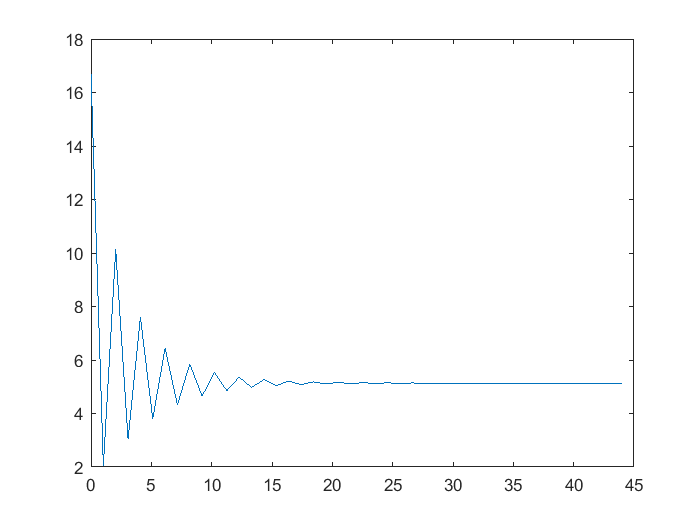

In [187]:
lambda = 0;
dif_theta=1;

theta_0 = 1
tol =  1e-6;

it = 0;

options = optimoptions('fsolve', 'Display', 'off');

while dif_theta>tol
    fun = @(rhoU) unem_solver(rhoU,z,theta_0,gamma,beta,mu,sigma,rho,delta);
    [rhoU1, fval_unem] = fsolve(fun,x0, options);

    fun = @(theta) theta_solver(rhoU1,c,theta,gamma,beta,mu,sigma,rho,delta);
    [theta1, fval_theta] = fsolve(fun,theta_0, options);

    dif_theta=abs(theta_0-theta1);

    theta_0=theta_0*lambda + theta1*(1-lambda);
    it = it + 1;
    
    vector_theta(it,1)=theta_0;
end

figure
plot(linspace(0,it,it), vector_theta)

As you can see, the values of $\theta$ are moving significantly during the iterations. This is not ideal because we could be trapped in local values. We will check our results by updating slowly, using the $\lambda$ parameter equal to 0.5.

theta_0 = 1

theta_0 = 5.1368

rhoU1 = 6.1367

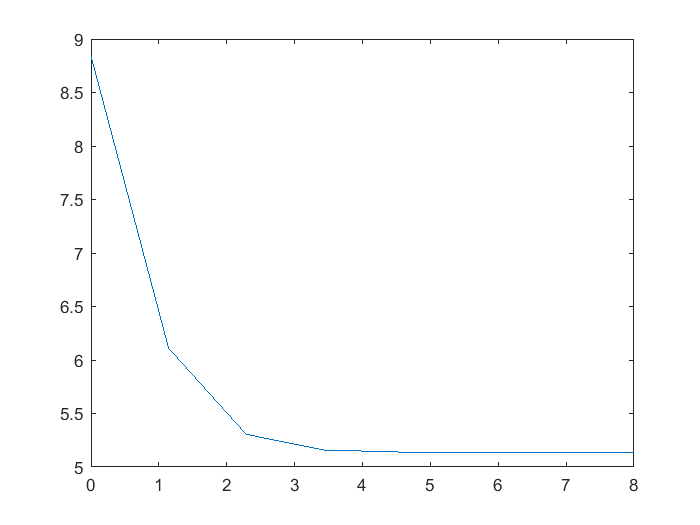

In [193]:
lambda = 0.5;
dif_theta=1;

theta_0 = 1
tol =  1e-6;

it = 0;

options = optimoptions('fsolve', 'Display', 'off');

while dif_theta>tol
    fun = @(rhoU) unem_solver(rhoU,z,theta_0,gamma,beta,mu,sigma,rho,delta);
    [rhoU1, fval_unem] = fsolve(fun,x0, options);

    fun = @(theta) theta_solver(rhoU1,c,theta,gamma,beta,mu,sigma,rho,delta);
    [theta1, fval_theta] = fsolve(fun,theta_0, options);

    dif_theta=abs(theta_0-theta1);

    theta_0=theta_0*lambda + theta1*(1-lambda);
    it = it + 1;
    
    vector_theta2(it,1)=theta_0;
end

theta_0
rhoU1

figure
plot(linspace(0,it,it), vector_theta2)

Pretty cool, eh? The equilibrium we found does not change with the slow updating, but we found it in just 8 iterations instead of 44. This will not always work, but it is a valuable trip to have in mind.

## 4. Structures

Imagine we want to solve the model with different parameters and compare the solutions. This can be tedious because we will have to change the parameters for the entire setting whenever we want to generate a change. 

One way of dealing with this problem is through the use of structures. Consider the following code:

In [157]:
pars.z     = 1     ; % Instant utility of being unemployed
pars.delta = 0.05  ; % Probability of job destruction
pars.beta  = 0.5   ; % Bargain power of workers
pars.mu    = 5     ; % Mean of productivity
pars.sigma = 2.5   ; % Standard deviation of productivity
pars.c     = 1     ; % Cost of openning a vacancy
pars.rho   = 0.067 ; % Discount factor
pars.gamma = 0.5   ; % Matching elasticity

This code is the same except for the "pars." before each variable. It creates a structure that stores the values of the parameters inside it. We call a structure like any other variable.

In [160]:
pars

pars = struct with fields:
        z: 1
    delta: 0.0500
     beta: 0.5000
       mu: 5
    sigma: 2.5000
        c: 1
      rho: 0.0670
    gamma: 0.5000

So now, imagine creating a function that will solve our model. This function could request all the parameters, but we can just request a structure!

In [184]:
model(pars)

x0 = 1

theta_0 = 1

ans = 1x2 double
    5.1368    6.1367

Pretty nice! So now, imagine that we want to change just one model parameter. For example, we want to know what will happen with the value of unemployment if $z$ increases to 2.

Instead of creating a new set of parameters, we can duplicate our pars structure, change one bit of it, and introduce the new structure into the function.

In [178]:
set = pars;
set.z = 2;
set

set = struct with fields:
        z: 2
    delta: 0.0500
     beta: 0.5000
       mu: 5
    sigma: 2.5000
        c: 1
      rho: 0.0670
    gamma: 0.5000

In [195]:
model(set)

x0 = 1

theta_0 = 1

ans = 1x2 double
    4.2833    6.2833

We have that the increase in $z$ changes the value of unemployment, increasing it, which makes sense. Also, it decreases the market tightness. The additional compensation for unemployment makes it more difficult for firms to find workers, and given the fixed costs of posting a vacancy, there will be fewer vacancies available.

## 5. Classes

Now, let's consider generating a class. First, we will give an example and then code a solution to our model using a class.

A class is an object in MATLAB that will store parameters and functions that will apply to the parameters you have provided. A class comprises two main elements: the properties and the methods. Let's check this example.

In [206]:
classdef BasicClass
   properties
      Value {mustBeNumeric}
   end
   methods
      function r = roundOff(obj)
         r = round([obj.Value],2);
      end
      function r = multiplyBy(obj,n)
         r = [obj.Value]*n;
      end
   end
end

So, the properties in this class are empty, but the methods are not. There are two methods in it. One is the function roundOff(), which takes a value and rounds it up to the second decimal, and the other is the function multiplyBy(), which multiplies a value times n.

We can create an element of this class with the following command:

In [214]:
a = BasicClass

a = 
  <a href="matlab:helpPopup BasicClass" style="font-weight:bold">BasicClass</a> with properties:

    Value: []

Now, we will assign a value:

In [217]:
a.Value = pi/3;

In [219]:
a.Value

ans = 1.0472

Then, we can apply the function roundOff() with:

In [226]:
a.roundOff

ans = 1.0500

And the function multiplyBy() with:

In [229]:
a.multiplyBy(3)

ans = 3.1416

Excellent! Now, we will create an m.file for our model using the class structure. Check this code:

In [14]:
classdef ModelClass
   properties
        z     = 1     ; % Instant utility of being unemployed
        delta = 0.05  ; % Probability of job destruction
        beta  = 0.5   ; % Bargain power of workers
        mu    = 5     ; % Mean of productivity
        sigma = 2.5   ; % Standard deviation of productivity
        c     = 1     ; % Cost of openning a vacancy
        rho   = 0.067 ; % Discount factor
        gamma = 0.5   ; % Matching elasticity
        lambda = 0.5  ; % Adjustment parameter
        x0=1          ; % Initial guess for fsolve
        theta_0=1     ; % Initial guess for market tightness
        dif_theta=1   ; % Initial difference for theta
        tol =  1e-6   ; % Tolerance parameter
   end
   methods
        function val = unem_solver(rhoU,z,theta,gamma,beta,mu,sigma,rho,delta)
            
            aux = @(x,beta,rhoU,rho,delta,mu,sigma) beta.*(x-rhoU)/(rho+delta)...
                                                    .*normpdf(x,mu,sigma);

            M = 1e+3;

            integral_worker = @(rhoU) integral( @(x) aux(x,obj.beta,rhoU,obj.rho,obj.delta,obj.mu,...
                                              obj.sigma),rhoU,M); % Attention with this!

            val = rhoU - obj.z - theta^(1-obj.gamma) .*  integral_worker(rhoU);
        end

        function val = theta_solver(rhoU,c,theta,gamma,beta,mu,sigma,rho,delta)

        aux = @(x,beta,rhoU,rho,delta,mu,sigma) beta.*(x-rhoU)/(rho+delta)...
                                                .*normpdf(x,mu,sigma);

        M=1e+3;

        integral_costs = @(rhoU) integral( @(x) aux(x,obj.beta,rhoU,obj.rho,obj.delta,obj.mu,...
                                          obj.sigma),rhoU,M);  % Attention with this!

        val = obj.c - theta.^(1-obj.gamma)/theta .* integral_costs(rhoU);
        end
       
       function val = run_model(obj)

        it = 0;

        options = optimoptions('fsolve', 'Display', 'off');
           
        theta_old  = obj.theta_0; %Attention with this!
        diff_theta = obj.dif_theta; %Attention with this!

        while diff_theta>obj.tol
            fun = @(rhoU) unem_solver(rhoU,obj.z,theta_old,obj.gamma,obj.beta,obj.mu,obj.sigma,obj.rho,obj.delta);
            [rhoU1, ~] = fsolve(fun,obj.x0, options);

            fun = @(theta) theta_solver(rhoU1,obj.c,theta,obj.gamma,obj.beta,obj.mu,obj.sigma,obj.rho,obj.delta);
            [theta1, ~] = fsolve(fun,theta_old, options);

            diff_theta=abs(theta_old-theta1);

            theta_old=theta_old*obj.lambda + theta1*(1-obj.lambda);
            it = it + 1;
        end

        val = [theta_old , rhoU1];
           
       end
   end
end

So, now we can create a model:

In [45]:
Original_Model = ModelClass

Original_Model = 
  <a href="matlab:helpPopup ModelClass" style="font-weight:bold">ModelClass</a> with properties:

            z: 1
        delta: 0.0500
         beta: 0.5000
           mu: 5
        sigma: 2.5000
            c: 1
          rho: 0.0670
        gamma: 0.5000
       lambda: 0.5000
           x0: 1
      theta_0: 1
    dif_theta: 1
          tol: 1.0000e-06

And run it:

In [47]:
Original_Model.run_model

ans = 1x2 double
    5.1368    6.1367

Amazing! Well done. So now, we will focus on understanding what happens when we have a change in all the relevant parameters. So, check what happens when you see a 10 percent increase in: 
- Unemployment benefits
- Probability of job destruction
- Mean of productivity
- Standard deviation of productivity
- Cost of opening a vacancy

In [56]:
ChangeZ_Model =  ModelClass;
ChangeZ_Model.z = Original_Model.z *1.1
ChangeZ_Model.run_model

ChangeZ_Model = 
  <a href="matlab:helpPopup ModelClass" style="font-weight:bold">ModelClass</a> with properties:

            z: 1.1000
        delta: 0.0500
         beta: 0.5000
           mu: 5
        sigma: 2.5000
            c: 1
          rho: 0.0670
        gamma: 0.5000
       lambda: 0.5000
           x0: 1
      theta_0: 1
    dif_theta: 1
          tol: 1.0000e-06

ans = 1x2 double
    5.0506    6.1505

If the unemployment benefits increase, we will see that workers are more picky with the offers. Then, the value of unemployment increases, and the market tightness decreases.

In [59]:
ChangeD_Model =  ModelClass;
ChangeD_Model.delta = Original_Model.delta *1.1
ChangeD_Model.run_model

ChangeD_Model = 
  <a href="matlab:helpPopup ModelClass" style="font-weight:bold">ModelClass</a> with properties:

            z: 1
        delta: 0.0550
         beta: 0.5000
           mu: 5
        sigma: 2.5000
            c: 1
          rho: 0.0670
        gamma: 0.5000
       lambda: 0.5000
           x0: 1
      theta_0: 1
    dif_theta: 1
          tol: 1.0000e-06

ans = 1x2 double
    5.0776    6.0776

This happens because an increase in the destruction rate of jobs will decrease the expected value of having a job, so the instant utility of being unemployed will decrease, but unemployment will increase too because there is a higher destruction of jobs, and this will imply a decrease in the market tightness.

In [64]:
ChangeMu_Model =  ModelClass;
ChangeMu_Model.mu = Original_Model.mu *1.1
ChangeMu_Model.run_model

ChangeMu_Model = 
  <a href="matlab:helpPopup ModelClass" style="font-weight:bold">ModelClass</a> with properties:

            z: 1
        delta: 0.0500
         beta: 0.5000
           mu: 5.5000
        sigma: 2.5000
            c: 1
          rho: 0.0670
        gamma: 0.5000
       lambda: 0.5000
           x0: 1
      theta_0: 1
    dif_theta: 1
          tol: 1.0000e-06

ans = 1x2 double
    5.5702    6.5702

This happens because an increase in the mean of productivity will increase the expected value of having a job, so the instant utility of being unemployed will increase, but unemployment will decrease too because there is a higher probability that the workers have a productivity draw higher than the reservation value (notice that the reservation value did not increase in 0.5!), then the market tightness increases.

In [68]:
ChangeSigma_Model =  ModelClass;
ChangeSigma_Model.sigma = Original_Model.sigma *1.1
ChangeSigma_Model.run_model

ChangeSigma_Model = 
  <a href="matlab:helpPopup ModelClass" style="font-weight:bold">ModelClass</a> with properties:

            z: 1
        delta: 0.0500
         beta: 0.5000
           mu: 5
        sigma: 2.7500
            c: 1
          rho: 0.0670
        gamma: 0.5000
       lambda: 0.5000
           x0: 1
      theta_0: 1
    dif_theta: 1
          tol: 1.0000e-06

ans = 1x2 double
    5.3790    6.3790

This happens because an increase in the stardard deviation of productivity will increase the expected value of having a job. This increase is because there are higher new wages available. So the instant utility of being unemployed will increase, but unemployment will decrease too because there is a higher probability that the workers have a productivity draw higher than the reservation value, so the market tightness increases.

In [72]:
ChangeC_Model =  ModelClass;
ChangeC_Model.c = Original_Model.c *1.1
ChangeC_Model.run_model

ChangeC_Model = 
  <a href="matlab:helpPopup ModelClass" style="font-weight:bold">ModelClass</a> with properties:

            z: 1
        delta: 0.0500
         beta: 0.5000
           mu: 5
        sigma: 2.5000
            c: 1.1000
          rho: 0.0670
        gamma: 0.5000
       lambda: 0.5000
           x0: 1
      theta_0: 1
    dif_theta: 1
          tol: 1.0000e-06

ans = 1x2 double
    4.6085    6.0693

This happens because an increase in the cost of a vacancy will reduce the expected value of having a job. This decrease is because now the same productivity draw will generate a lower wage than in the previous case. So the instant utility of being unemployed will decrease, and unemployment will increase too because there is a higher probability that the workers will not find a job, then the market tightness decreases.

## 6. Calibration

Let's think about what we have. We developed a model in which, if we know the parameters associated with the labor market, we can quantitatively predict what will happen when some of the parameters change. The above is impressive and is why structural modeling is becoming predominant in economics. When you develop this kind of model, all the mechanisms that affect the variables are clearly stated. Then, we have a relevant advantage over reduced form modeling, in which claiming causality is often off-limits.

Imagine now that we can adapt the parameters of our model to match those of an actual economy. Then, we could predict changes in the real world! That would be nice, and I am happy to tell you we can do that. In fact, we will adapt our parameters to match the real economy. The process of doing this adaptation is called calibration.

### 6.1 Average Wages

To calibrate a model, we will need what are called moments. A moment is just a statistic computed using the parameters of the model. For example, let's think about the average wages in our economy. A job will be accepted if:

$$ x > \rho U $$

Then the distribution of x conditional on accepting a job, $f(x)$, is given by:

$$ f(x) =  \frac{g(x)}{1-G(\rho U)}  $$

Then the average $x$ observed on those who accept is given by:
 
$$ f(x) =  \int_{\rho U}^\infty \frac{g(x)}{1-G(\rho U)} dx  = \frac{1}{1-G(\rho U)}  \int_{\rho U}^\infty g(x) dx $$

OK. So, to have the wages, we need to use the bargain equation. This equations says that:

$$ w = \beta x + (1-\beta) \rho U $$

Then:

$$ x = \frac{w-(1-\beta) \rho U}{\beta} $$

And notice that:

$$ \frac{dx}{dw} = \frac{1}{\beta} $$

Then (do not show this to your mathematician friend):

$$ dx = \frac{1}{\beta} dw $$

Then, we can write the average observed wage in this economy as:

$$ \mbox{Average Wage} = \frac{1}{1-G(\rho U)} \frac{1}{\beta} \int_{\rho U}^\infty w \cdot g \left(  \frac{w-(1-\beta) \rho U}{\beta} \right) dw $$

Excellent! Now we can write a function to compute the average wages in our economy:

In [76]:
mu    = 5      ; % Mean of productivity 
sigma = 2.5    ; % Standard deviation of productivity
theta = 5.1368 ; % Market tightness
rhoU  = 6.1367 ; % Value of unemployment
beta  = 0.5    ; % Bargaining power of workers
M     = 1000   ; % Integration limit

aux_int = @(w) normpdf( (w-(1-beta)*rhoU)/beta ,mu,sigma )

AW = 1/(1-normcdf(rhoU,mu,sigma)) * 1/beta * integral( @(w) aux_int(w).*w, rhoU, M)

aux_int = function_handle with value:
    @(w)normpdf((w-(1-beta)*rhoU)/beta,mu,sigma)

AW = 6.9535

Does this average make sense? Well, we will check graphically. With this code:

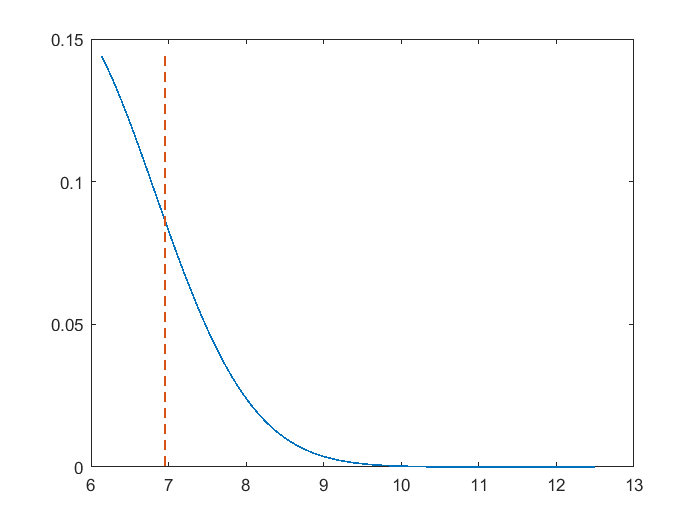

In [100]:
x = linspace(rhoU,12.5,5000);

figure
plot(x, aux_int(x), 'LineWidth',1 )
hold on
plot(AW*ones(1,5000),aux_int(x),'LineWidth',1,'Linestyle','--')

### 6.2 Standard Deviation

So yes, it makes sense! Now, regarding the standard deviation, we will use an old trick:

$$ \mbox{Standard Deviation} = \sqrt{ \mbox{Average Wage($x^2$)} - \mbox{Average Wage($x$)}^2 } $$

So, the code then is given by:

In [109]:
aux_int = @(w) normpdf( (w-(1-beta)*rhoU)/beta ,mu,sigma )

AW2 = 1/(1-normcdf(rhoU,mu,sigma)) * 1/beta * integral( @(w) aux_int(w).*w.^2, rhoU, M)

SD = sqrt(AW2-(AW).^2)

aux_int = function_handle with value:
    @(w)normpdf((w-(1-beta)*rhoU)/beta,mu,sigma)

AW2 = 48.7819

SD = 0.6566

### 6.3 Unemployment and employment

We know that, in equilibrium, the inflow to unemployment and outflow from unemployment will be given by:

$$ \delta e = m(\theta) [1-G(\rho U)] u $$
$$ u + e = 1 $$

From the first equation, we know that:

$$ e = \frac{1}{\delta} m(\theta) [1-G(\rho U)] u $$

Then:

$$ u + \frac{1}{\delta} m(\theta) [1-G(\rho U)] u = 1 $$

$$ u = \frac{\delta}{\delta + m(\theta) [1-G(\rho U)]} $$

And therefore:

$$ e =  \frac{m(\theta) [1-G(\rho U)]}{\delta + m(\theta) [1-G(\rho U)]} $$

Brilliant! So now we can generate the code to find those levels in our model:

In [141]:
UNEM = delta/(delta+theta^(1-gamma)*(1-normcdf(rhoU,mu,sigma)))
EMPL = 1 - UNEM

UNEM = 0.0636

EMPL = 0.9364